In [1]:
import sys, os
import numpy as np
# import c3dp

In [2]:
parent_dir = os.path.abspath(os.pardir)
libpath = os.path.join(parent_dir, 'c3dp')

if not libpath in sys.path:
    sys.path.insert(0, libpath)

In [3]:
parent_dir

'/home/fi0/c3dp_JOB/second_repo/c3dp'

In [4]:
### converting neutron events saved from McStas to McVine
from instruments.guide.COnversion_MCSTAStoMCVINE_file import mcstas2mcvine

mcstas_file_name = 'neutrons_before_sample_oldG.dat'
mcvine_file_name= 'Neutrons_mcvine.dat'
Mcstas_file_path=os.path.join(parent_dir, 'McStas_file/{mcstas_file_name}'.format(mcstas_file_name=mcstas_file_name))
McVine_file_path=os.path.join(parent_dir, 'beam/{mcvine_file_name}'.format(mcvine_file_name=mcvine_file_name))

mcstas2mcvine(Mcstas_file_path, McVine_file_path)

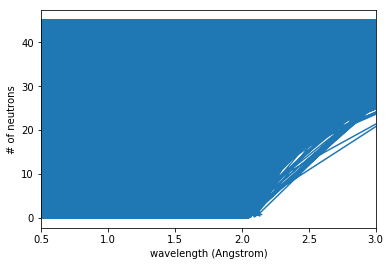

In [5]:
### verified the neutron events saved in macvine file
from reduction.neutrons2lambda import process , convert2histogram
lam, d, p = process(McVine_file_path)

from matplotlib import pyplot as plt
plt.figure()
plt.plot (lam, p)
plt.xlabel('wavelength (Angstrom)')
plt.ylabel('# of neutrons')
plt.xlim(0.5,3)
plt.show()

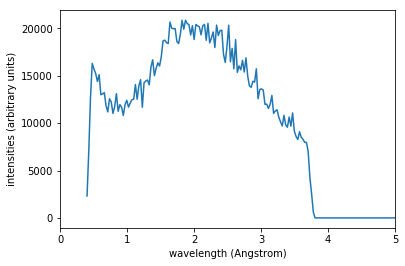

In [6]:
# verified by creating the histogram 
lambda_bin, I_lambda, error = convert2histogram (lam, p, 1000)

plt.figure()
plt.plot (lambda_bin, I_lambda)
plt.xlabel('wavelength (Angstrom)')
plt.ylabel('intensities (arbitrary units)')
plt.xlim(0,5)
plt.show()

Three files are needed to make the sampleassembly file:
    Geometry file (.xml file), 
    unit cell information (.cif file) and 
    scattering kernels file (name-scatterer.xml file) which defines the scattering formula or diffraction peaks

In [7]:
### creating sample geometry ###################
from instruments.cellgeometry.clampcell_geo import Clampcell
sample_height=28.57
sample_dia=4.16
clampCell= Clampcell(sample_height=sample_height)
sample= clampCell.sample(sample_dia=sample_dia)
sample_geo_directory = os.path.join(parent_dir, 'sample')
sample_geo_filename = 'sample_geo'
clampCell.creating_geometry_xml(sample,sample_geo_filename, sample_geo_directory, False)

In [8]:
sample_geo_file_directory = os.path.join (sample_geo_directory, sample_geo_filename)

In [9]:
############ creating sample diffraction peaks #################
import instruments.scatkernel.Diffraction_peaks as diff
sample_Formula= 'Si'
cif_file_name= '{}.cif'.format(sample_Formula) 
input_cifFile_path = os.path.join(parent_dir, 'CIF_file/{cif_file_name}'.format(cif_file_name=cif_file_name))
number_peaks = 1
first_peak_index = 3
filePath_toSave_temperature = os.path.join(parent_dir, 'c3dp/instruments/scatkernel/bem')
filePath_tosave_DiffractionPeakResult= os.path.join(parent_dir, 'sample/{}'.format(sample_Formula))
significant_coponent= sample_Formula
diff.diffraction(input_cifFile_path,filePath_toSave_temperature, filePath_tosave_DiffractionPeakResult, significant_coponent, 
                 first_peak_index=first_peak_index, number_of_peaks=number_peaks ,Temperatrure=300)

/home/fi0/c3dp_JOB/second_repo/c3dp/c3dp/instruments/scatkernel/braggedgemodeling/bem/__init__.py:19: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(open(conf_path))


In [10]:
### creating sample scattering kernel file ##################
import instruments.scatkernel.scattering_kernal_program as skp
diffraction_peak_path= filePath_tosave_DiffractionPeakResult
scaterer_type_name = 'sample'
kernel_type = 'elastic'
path_toSave_scaterinfKernel_file = os.path.join(parent_dir, 'sample')
skp.makeSKXML(kernel_type,path_toSave_scaterinfKernel_file, scaterer_type_name, diffraction_peak_path )

In [11]:
### creating cell (outer_body) geometry ###################
from instruments.cellgeometry.clampcell_geo import Clampcell
sample_height=28.57
outer_dia=32.05
clampCell= Clampcell(sample_height=sample_height)
cell_outerBody= clampCell.outer_body(outer_dia=32.05)
cell_outerBody_geo_directory = os.path.join(parent_dir, 'sample')
cell_outerBody_geo_filename = 'cell_outerBody_geo'
clampCell.creating_geometry_xml(cell_outerBody,cell_outerBody_geo_filename, cell_outerBody_geo_directory, False)

In [12]:
outerBody_geo_file_directory = os.path.join (cell_outerBody_geo_directory, cell_outerBody_geo_filename)

In [13]:
############ creating cell (outer_body) diffraction peaks #################
import instruments.scatkernel.Diffraction_peaks as diff
outerBody_Formula= 'Al'
cif_file_name= '{}.cif'.format(outerBody_Formula) 
input_cifFile_path_cell = os.path.join(parent_dir, 'CIF_file/{cif_file_name}'.format(cif_file_name=cif_file_name))
first_peak_index = 5
filePath_toSave_temperature = os.path.join(parent_dir, 'c3dp/instruments/scatkernel/bem')
filePath_tosave_DiffractionPeakResult= os.path.join(parent_dir, 'sample/{}'.format(outerBody_Formula))
significant_coponent= outerBody_Formula
diff.diffraction(input_cifFile_path_cell,filePath_toSave_temperature, filePath_tosave_DiffractionPeakResult, significant_coponent,
                 first_peak_index=first_peak_index, number_of_peaks=number_peaks ,Temperatrure=300)

In [14]:
### creating cell (outer_body) scattering kernel file ##################
import instruments.scatkernel.scattering_kernal_program as skp
diffraction_peak_path= filePath_tosave_DiffractionPeakResult
scaterer_type_name_outerBody = 'outer_body'
kernel_type = 'elastic'
path_toSave_scaterinfKernel_file = os.path.join(parent_dir, 'sample')
skp.makeSKXML(kernel_type,path_toSave_scaterinfKernel_file, scaterer_type_name_outerBody, diffraction_peak_path )

In [15]:
### creating cell (iiner_sleeve) geometry ###################
from instruments.cellgeometry.clampcell_geo import Clampcell
sample_height=28.57
inner_dia=4.7
clampCell= Clampcell(sample_height=sample_height)
cell_innerSleeve= clampCell.inner_sleeve(inner_dia=4.7)
cell_inner_sleeve_geo_directory = os.path.join(parent_dir, 'sample')
cell_inner_sleeve_geo_filename = 'cell_inner_sleeve_geo'
clampCell.creating_geometry_xml(cell_innerSleeve,cell_inner_sleeve_geo_filename, cell_inner_sleeve_geo_directory, False)

In [16]:
inner_sleeve_geo_file_directory = os.path.join (cell_inner_sleeve_geo_directory, cell_inner_sleeve_geo_filename)

In [17]:
############ creating cell (inner_sleeve) diffraction peaks #################
import instruments.scatkernel.Diffraction_peaks as diff
inner_sleeve_Formula= 'Cu'
cif_file_name= '{}.cif'.format(inner_sleeve_Formula) 
input_cifFile_path_inner_sleeve = os.path.join(parent_dir, 'CIF_file/{cif_file_name}'.format(cif_file_name=cif_file_name))
first_peak_index = 0
filePath_toSave_temperature = os.path.join(parent_dir, 'c3dp/instruments/scatkernel/bem')
filePath_tosave_DiffractionPeakResult= os.path.join(parent_dir, 'sample/{}'.format(inner_sleeve_Formula))
significant_coponent= inner_sleeve_Formula
diff.diffraction(input_cifFile_path_inner_sleeve,filePath_toSave_temperature, filePath_tosave_DiffractionPeakResult, significant_coponent, 
                 first_peak_index = first_peak_index, number_of_peaks=number_peaks ,Temperatrure=300)

In [18]:
### creating cell (inner_sleeve) scattering kernel file ##################
import instruments.scatkernel.scattering_kernal_program as skp
diffraction_peak_path= filePath_tosave_DiffractionPeakResult
scaterer_type_name_inner_sleeve = 'inner_sleeve'
kernel_type = 'elastic'
path_toSave_scaterinfKernel_file = os.path.join(parent_dir, 'sample')
skp.makeSKXML(kernel_type,path_toSave_scaterinfKernel_file, scaterer_type_name_inner_sleeve, diffraction_peak_path )

In [19]:
input_cifFile_path_cell

'/home/fi0/c3dp_JOB/second_repo/c3dp/CIF_file/Al.cif'

In [20]:
### creating the assembly ##################
from instruments.sampleassembly_program import makeSAXML
sample_assembly_fileName = 'sample'
shape_name_sample = 'shapeSample'
shape_name_outerBody = 'shapeOuterBody'
shape_name_innerSleeve = 'shapeInnerSleeve'
structure_file_type ='cif'

scatterer = {
            (scaterer_type_name_outerBody, shape_name_outerBody , outerBody_geo_file_directory, outerBody_Formula ,input_cifFile_path_cell, structure_file_type),
            (scaterer_type_name_inner_sleeve,shape_name_innerSleeve , inner_sleeve_geo_file_directory, inner_sleeve_Formula ,input_cifFile_path_inner_sleeve, structure_file_type),
            (scaterer_type_name, shape_name_sample , sample_geo_file_directory, sample_Formula ,input_cifFile_path, structure_file_type),
            
            }

makeSAXML(sample_assembly_fileName, path_toSave_scaterinfKernel_file, scatterer)

In [21]:
#### defining parameters to run simulation####
import optimization.optimization_collimator as opt
cell=opt.Collimators()
cell.parameters(ncount=1e6,source_file=mcvine_file_name, 
                sampleassembly_fileName=sample_assembly_fileName, sourceTosample_z=0.02)

/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:17: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.
  from ._kernel import *
/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:17: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
  from ._kernel import *


In [22]:
##### running simulation to calculate diffraction pattern #####

1e-05
1
0
0
47.2435936359
0
15.12
0
0
1e-05
1
0
0
66.4178238844
0
0.924
0

/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd842f838> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)



0
1e-05
1
0
0
160.149892567
0
1.368
0
0
('detector_angle: ', -50)
(768, 768)


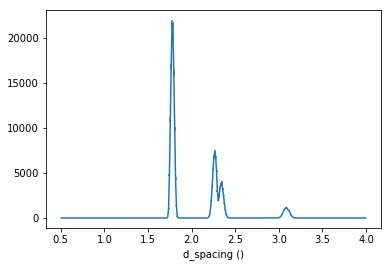

CPU times: user 4min 6s, sys: 1min 7s, total: 5min 13s
Wall time: 3min 43s


In [23]:
%%time
diffraction_pattern_clampCell = cell.diffraction_pattern_calculation ()

In [24]:
##### COLLLIMATOR mATERIAL scattering kernel #################

In [25]:
import instruments.scatkernel.scattering_kernal_program as skp
kernel_type = 'inelastic'
scaterer_type_name = 'plastic_collimator'
S_Q_E = "exp(-2.07*Q*Q/30.)"
Q_min = "0./angstrom"
Q_max = "15./angstrom"
Energy_transfer = '-2.07*Q*Q'
path_toSave_scateringKernel_file = os.path.join(parent_dir, 'sample')

skp.makeSKXML(kernel_type,path_toSave_scateringKernel_file, scaterer_type_name,
              E=Energy_transfer, S_Q_E=S_Q_E, Qmin=Q_min, Qmax=Q_max) # it can not be E, it has to be E_Q

In [26]:
#### creating the sample assembly for collimator #################

In [27]:
path_tosave_collimator_geometry = os.path.join(parent_dir, 'sample')
collimator_geo_file_Name = 'plastic_collimator'
collimator_geo_file = os.path.join (path_tosave_collimator_geometry, collimator_geo_file_Name)

In [28]:
### creating the sample assembly ##################
from instruments.sampleassembly_program import makeSAXML
sample_assembly_fileName = 'collimator'
shape_name = 'shapeCollimator'
structure_file_type ='xyz'
sample_Formula = 'H'
input_xyz_file_path = os.path.join(parent_dir, 'sample/H.xyz')
path_toSave_scateringnel_file = os.path.join(parent_dir, 'sample')
scatterer = {
            (scaterer_type_name,shape_name , collimator_geo_file, sample_Formula ,input_xyz_file_path, structure_file_type)
             
            }

makeSAXML(sample_assembly_fileName, path_toSave_scateringKernel_file, scatterer)

In [ ]:
#### defining parameters to run optimization####
import optimization.optimization_collimator as opt
coll=opt.Collimators()
coll.parameters(Snap_angle = True, coll_sim = True  ,
                   source_file = 'sample.mcvine',
                    beam_path='/home/fi0/c3dp_JOB/second_repo/c3dp/out/sample/rank0-step0',
                    template =None,
                    SNAP_definition_file =None,
                    nodes=20,
                    sampleassembly_fileName = sample_assembly_fileName,
                    path_tosave_collimator_geometry = collimator_geo_file,
                    collimator_detector_width = 160,
                    collimator_detector_height = 65.,
                    min_channel_wall_thickness = 1,
                    min_channel_size = 3.,
                    multiple_collimator = False,
                    collimator_Nosupport = True,
                    scad_flag = False,
                    ncount=1e6, sourceTosample_x = 0.0,
                    sourceTosample_y = 0.0, sourceTosample_z = 0.0, moderatorTosample_z=-14,
                    angleMons = [-50, 105] ,
                    collimator_angles=[-45],
                    sampleTodetector_z=[0.5, 0.5], detector_width=[0.5,0.5], detector_height=[0.5, 0.5],
                    number_pixels_in_height=[256, 256],
                    number_pixels_in_width=[256, 256], number_of_box_in_height=[3,3],
                    number_of_box_in_width=[3,3], masking = False,
                    masked_template = 'coll_plastic_SCAT_masked.nxs',
                    binning=[0.5, 0.01, 4.],number_of_detectors= 1,
                    )

('coll height at detector side: ', 30.695796281496094)
('coll width at detector side: ', 30.695796281496094)
('vertical number of channels: ', 5.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd82f0368> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


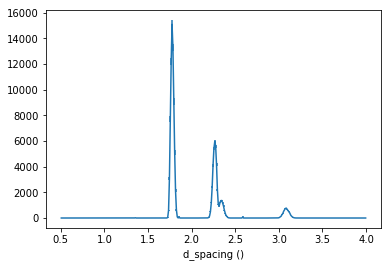

('coll_len,:', 7.168154834171004, 'focal_distance,:', 29.666800703624308, 'collimator_performance: ', 0.0874349471362307)
('coll height at detector side: ', 25.197055386492174)
('coll width at detector side: ', 25.197055386492174)
('vertical number of channels: ', 5.0)
('detector_angle: ', -50)
(768, 768)

/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd8201730> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


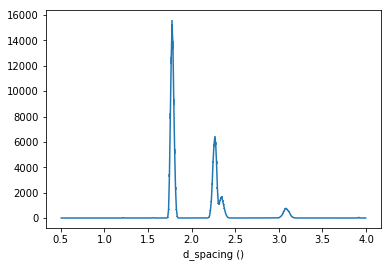

('coll_len,:', 3.842656930907679, 'focal_distance,:', 26.39380953288293, 'collimator_performance: ', 0.08136519298521117)
('coll height at detector side: ', 31.501702386659662)
('coll width at detector side: ', 31.501702386659662)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc87a2520> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


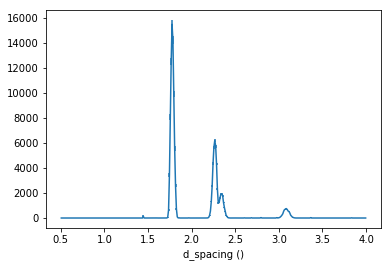

('coll_len,:', 2.059659677981469, 'focal_distance,:', 35.74238318601012, 'collimator_performance: ', 0.07877720288986216)
('coll height at detector side: ', 42.66698371464886)
('coll width at detector side: ', 42.66698371464886)
('vertical number of channels: ', 9.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc86ec260> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


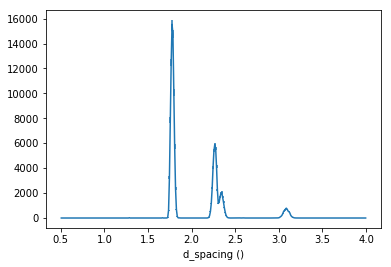

('coll_len,:', 3.2544184783753254, 'focal_distance,:', 47.9459619792033, 'collimator_performance: ', 0.07952693211731902)
('coll height at detector side: ', 39.83377050548374)
('coll width at detector side: ', 39.83377050548374)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc862fa48> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


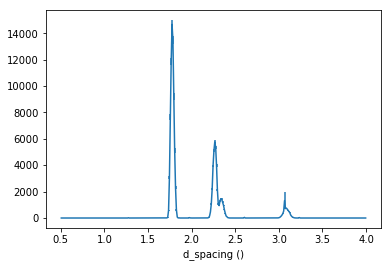

('coll_len,:', 7.67052541988422, 'focal_distance,:', 40.12999918669627, 'collimator_performance: ', 0.09742145815558541)
('coll height at detector side: ', 20.915886824005426)
('coll width at detector side: ', 20.915886824005426)
('vertical number of channels: ', 4.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc85674c8> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


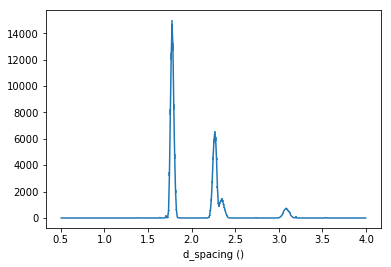

('coll_len,:', 4.651932372927608, 'focal_distance,:', 20.4471318158789, 'collimator_performance: ', 0.0831099571548154)
('coll height at detector side: ', 25.226386008435867)
('coll width at detector side: ', 25.226386008435867)
('vertical number of channels: ', 4.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc849f3c0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


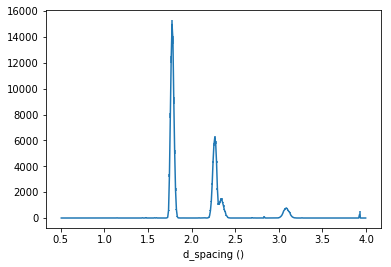

('coll_len,:', 6.10740818790022, 'focal_distance,:', 24.164255022222818, 'collimator_performance: ', 0.0859111286623544)
('coll height at detector side: ', 41.194528133660235)
('coll width at detector side: ', 41.194528133660235)
('vertical number of channels: ', 8.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc83e78e8> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


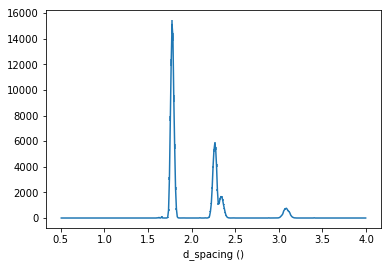

('coll_len,:', 5.3602768953269635, 'focal_distance,:', 44.073156865065314, 'collimator_performance: ', 0.08405990752434443)
('coll height at detector side: ', 39.48354646187882)
('coll width at detector side: ', 39.48354646187882)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc862fd08> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


(768, 768)


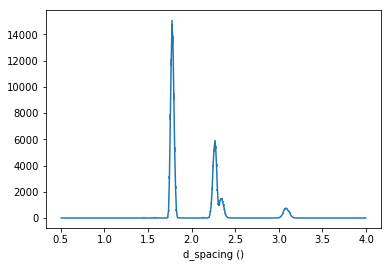

('coll_len,:', 7.250256567558313, 'focal_distance,:', 40.12999918669627, 'collimator_performance: ', 0.08645704200620068)
('coll height at detector side: ', 27.387156923593405)
('coll width at detector side: ', 27.387156923593405)
('vertical number of channels: ', 5.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc862f260> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


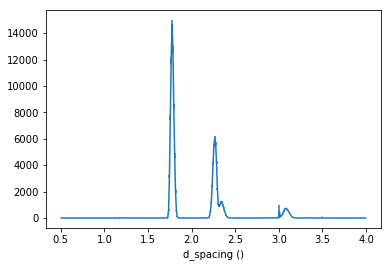

('coll_len,:', 6.470778775429156, 'focal_distance,:', 26.39380953288293, 'collimator_performance: ', 0.09391334830361246)
('coll height at detector side: ', 27.46259160524271)
('coll width at detector side: ', 27.46259160524271)
('vertical number of channels: ', 5.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd9d22b50> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


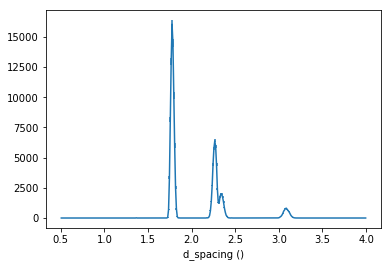

('coll_len,:', 3.1641015134612056, 'focal_distance,:', 29.791008412830042, 'collimator_performance: ', 0.08079834235825616)
('coll height at detector side: ', 43.125706045026526)
('coll width at detector side: ', 43.125706045026526)
('vertical number of channels: ', 9.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc84d3a48> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


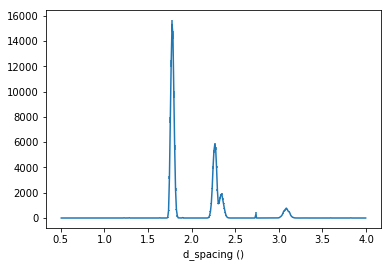

('coll_len,:', 4.203914564710709, 'focal_distance,:', 47.546932689321125, 'collimator_performance: ', 0.08117708249226718)
('coll height at detector side: ', 39.87294486496164)
('coll width at detector side: ', 39.87294486496164)
('vertical number of channels: ', 8.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc83a41b0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


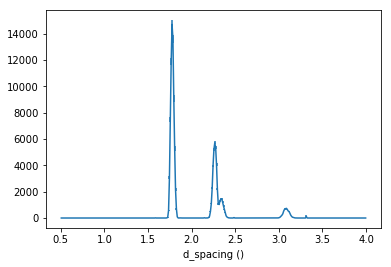

('coll_len,:', 5.953318415022182, 'focal_distance,:', 41.89421542293178, 'collimator_performance: ', 0.08612359247715543)
('coll height at detector side: ', 23.1162907551805)
('coll width at detector side: ', 23.1162907551805)
('vertical number of channels: ', 4.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd8343050> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


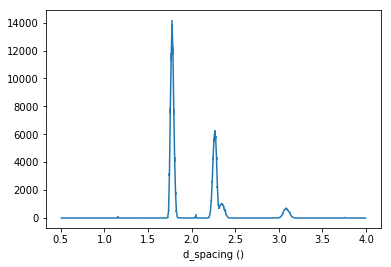

('coll_len,:', 7.2924170903376995, 'focal_distance,:', 20.4471318158789, 'collimator_performance: ', 0.08525231421267157)
('coll height at detector side: ', 34.056845571268354)
('coll width at detector side: ', 34.056845571268354)
('vertical number of channels: ', 6.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc845c838> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


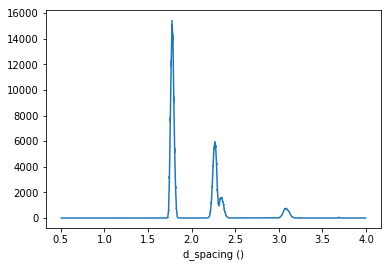

('coll_len,:', 6.10740818790022, 'focal_distance,:', 34.76080649762181, 'collimator_performance: ', 0.08530663735236094)
('coll height at detector side: ', 33.68862924089147)
('coll width at detector side: ', 33.68862924089147)
('vertical number of channels: ', 6.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc87cb9f0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


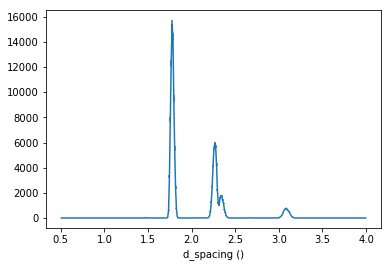

('coll_len,:', 5.1487709019860235, 'focal_distance,:', 35.27758418708374, 'collimator_performance: ', 0.08349960018839889)
('coll height at detector side: ', 19.65664731719483)
('coll width at detector side: ', 19.65664731719483)
('vertical number of channels: ', 4.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc8706368> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


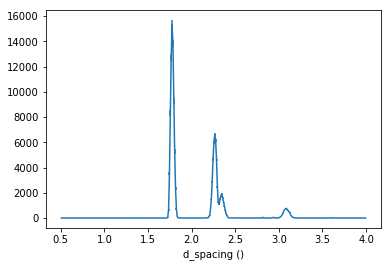

('coll_len,:', 2.852928472572593, 'focal_distance,:', 20.735048308061206, 'collimator_performance: ', 0.07872886369972436)
('coll height at detector side: ', 34.95997117439358)
('coll width at detector side: ', 34.95997117439358)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc85d6c00> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


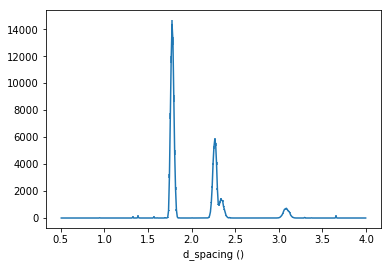

('coll_len,:', 5.921464610451928, 'focal_distance,:', 36.03050079882037, 'collimator_performance: ', 0.08506360991195921)
('coll height at detector side: ', 19.742598091734394)
('coll width at detector side: ', 19.742598091734394)
('vertical number of channels: ', 4.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc82ee788> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


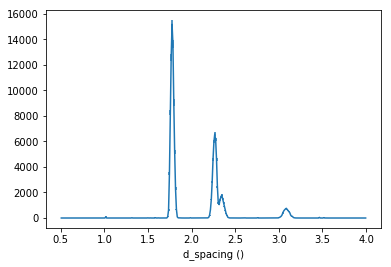

('coll_len,:', 3.1641015134612056, 'focal_distance,:', 20.527016196620067, 'collimator_performance: ', 0.08120660386662736)
('coll height at detector side: ', 25.70161965439726)
('coll width at detector side: ', 25.70161965439726)
('vertical number of channels: ', 4.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc82e7ba8> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


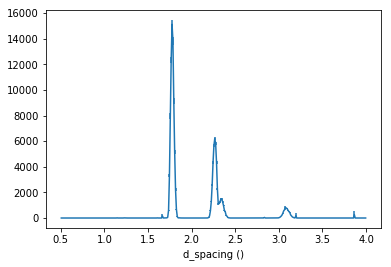

('coll_len,:', 6.1582623227640605, 'focal_distance,:', 24.68368126251265, 'collimator_performance: ', 0.08924930009424623)
('coll height at detector side: ', 22.25104170780611)
('coll width at detector side: ', 22.25104170780611)
('vertical number of channels: ', 3.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd9d09aa0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


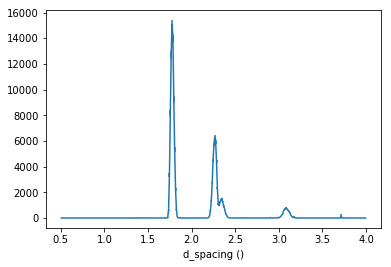

('coll_len,:', 6.596152379783098, 'focal_distance,:', 20.105097669584232, 'collimator_performance: ', 0.086348500632113)
('coll height at detector side: ', 19.021923219568478)
('coll width at detector side: ', 19.021923219568478)
('vertical number of channels: ', 4.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd829aba8> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


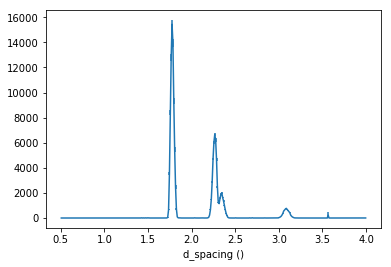

('coll_len,:', 2.3791760476032695, 'focal_distance,:', 20.4471318158789, 'collimator_performance: ', 0.07758092614500878)
('coll height at detector side: ', 23.157178978164275)
('coll width at detector side: ', 23.157178978164275)
('vertical number of channels: ', 4.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc862f4c8> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


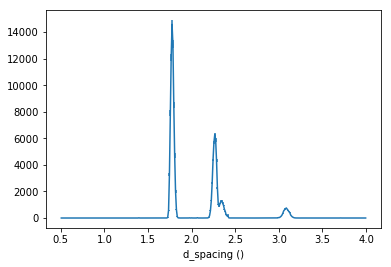

('coll_len,:', 5.80124507699616, 'focal_distance,:', 21.987369696800968, 'collimator_performance: ', 0.08516871882988448)
('coll height at detector side: ', 39.85240559594917)
('coll width at detector side: ', 39.85240559594917)
('vertical number of channels: ', 8.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc83f2890> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


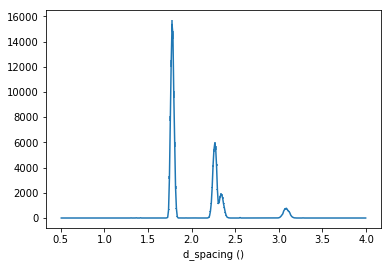

('coll_len,:', 3.749729850073691, 'focal_distance,:', 44.073156865065314, 'collimator_performance: ', 0.08197726488602287)
('coll height at detector side: ', 39.93269882358625)
('coll width at detector side: ', 39.93269882358625)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd8240db8> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


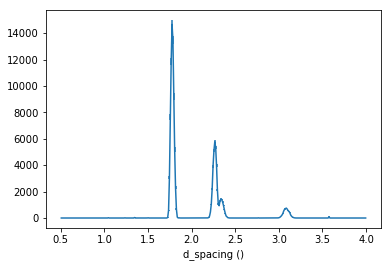

('coll_len,:', 7.78923940160723, 'focal_distance,:', 40.12999918669627, 'collimator_performance: ', 0.08695932887674732)
('coll height at detector side: ', 31.103804235142146)
('coll width at detector side: ', 31.103804235142146)
('vertical number of channels: ', 5.0)
('detector_angle: ', -50)
(768, 768)

/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd803d470> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


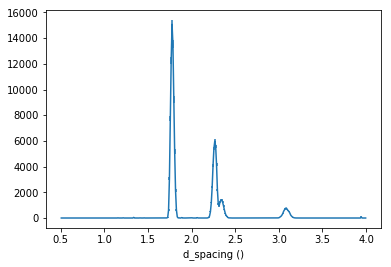

('coll_len,:', 7.190585538134991, 'focal_distance,:', 30.13397954403558, 'collimator_performance: ', 0.08719701236735249)
('coll height at detector side: ', 31.344117045154412)
('coll width at detector side: ', 31.344117045154412)
('vertical number of channels: ', 6.0)
('detector_angle: ', -50)
(768, 768)

/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc878d3c0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


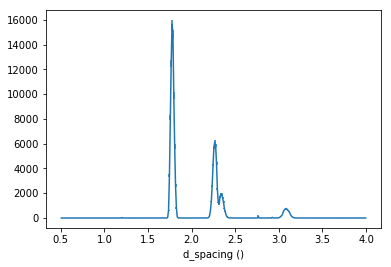

('coll_len,:', 3.1641015134612056, 'focal_distance,:', 34.44883894072409, 'collimator_performance: ', 0.08078368002826897)
('coll height at detector side: ', 25.87860157729974)
('coll width at detector side: ', 25.87860157729974)
('vertical number of channels: ', 4.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc8745c00> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


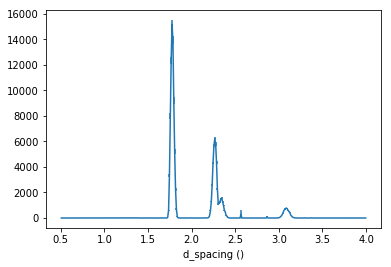

('coll_len,:', 6.177200928336772, 'focal_distance,:', 24.877120964422918, 'collimator_performance: ', 0.08581371298948559)
('coll height at detector side: ', 43.913943712529345)
('coll width at detector side: ', 43.913943712529345)
('vertical number of channels: ', 9.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc8533ec0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


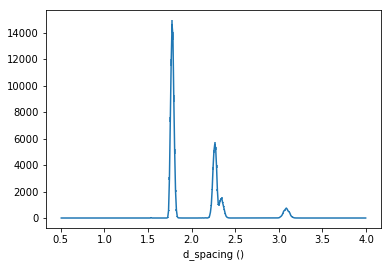

('coll_len,:', 6.8855730223667555, 'focal_distance,:', 45.811159432668454, 'collimator_performance: ', 0.08422238818952256)
('coll height at detector side: ', 20.798851811956567)
('coll width at detector side: ', 20.798851811956567)
('vertical number of channels: ', 4.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc84e2158> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


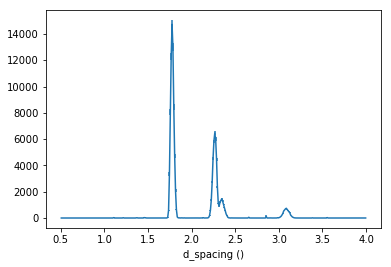

('coll_len,:', 4.511490358468979, 'focal_distance,:', 20.4471318158789, 'collimator_performance: ', 0.08188442571711974)
('coll height at detector side: ', 43.24984882738668)
('coll width at detector side: ', 43.24984882738668)
('vertical number of channels: ', 9.0)
('detector_angle: ', -50)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd84de578> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


(768, 768)


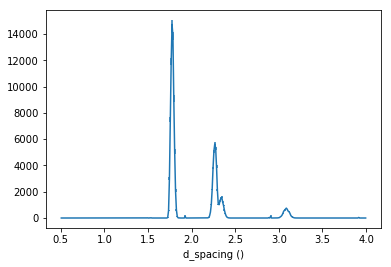

('coll_len,:', 6.164976726026162, 'focal_distance,:', 45.734841866837854, 'collimator_performance: ', 0.08529550212785485)
('coll height at detector side: ', 43.07924897730274)
('coll width at detector side: ', 43.07924897730274)
('vertical number of channels: ', 8.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd82812b8> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


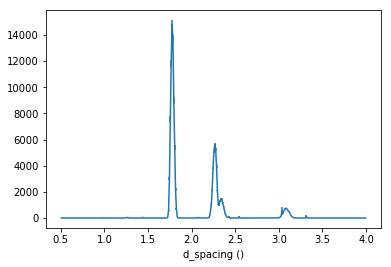

('coll_len,:', 7.621941907697972, 'focal_distance,:', 44.073156865065314, 'collimator_performance: ', 0.09297812881226465)
('coll height at detector side: ', 38.45011024186714)
('coll width at detector side: ', 38.45011024186714)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd8281628> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


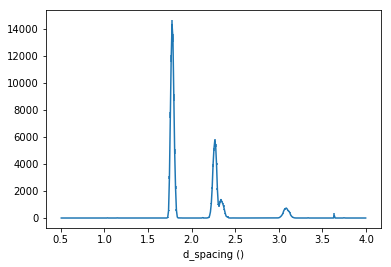

('coll_len,:', 7.67052541988422, 'focal_distance,:', 38.469606870356344, 'collimator_performance: ', 0.08724762039409131)
('coll height at detector side: ', 35.01933664429518)
('coll width at detector side: ', 35.01933664429518)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd842edb8> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


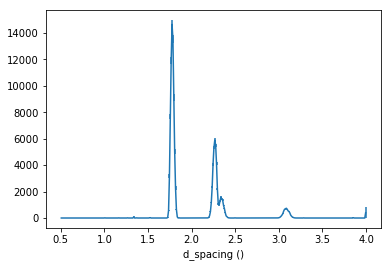

('coll_len,:', 5.251472386669517, 'focal_distance,:', 36.77173158648469, 'collimator_performance: ', 0.0837946580665702)
('coll height at detector side: ', 22.512500340640234)
('coll width at detector side: ', 22.512500340640234)
('vertical number of channels: ', 4.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd9d1dd08> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


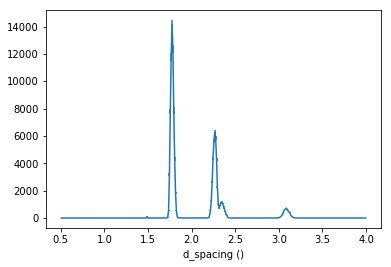

('coll_len,:', 6.4879842121482145, 'focal_distance,:', 20.527016196620067, 'collimator_performance: ', 0.08443233455104862)
('coll height at detector side: ', 22.405658083173623)
('coll width at detector side: ', 22.405658083173623)
('vertical number of channels: ', 4.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc83b2788> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


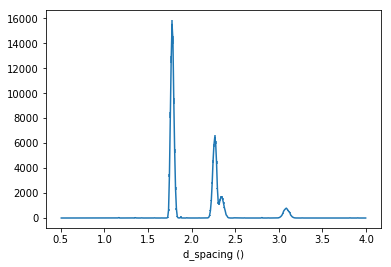

('coll_len,:', 3.83184748541363, 'focal_distance,:', 23.054942214394718, 'collimator_performance: ', 0.08312559008082943)
('coll height at detector side: ', 42.84825176396866)
('coll width at detector side: ', 42.84825176396866)
('vertical number of channels: ', 9.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc85c79f0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


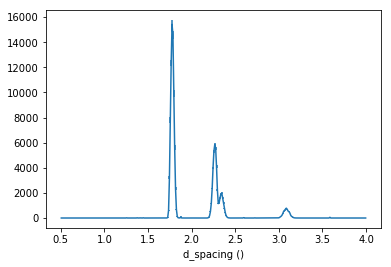

('coll_len,:', 3.75282367589934, 'focal_distance,:', 47.66507844086305, 'collimator_performance: ', 0.0813602096772597)
('coll height at detector side: ', 30.270520962654107)
('coll width at detector side: ', 30.270520962654107)
('vertical number of channels: ', 5.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc823fba8> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


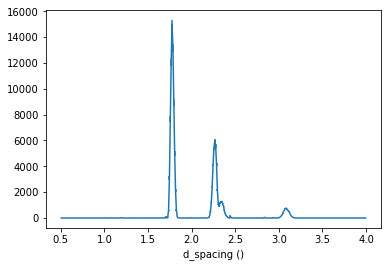

('coll_len,:', 7.2924170903376995, 'focal_distance,:', 29.032208064847225, 'collimator_performance: ', 0.08750689346338152)
('coll height at detector side: ', 43.669381779018)
('coll width at detector side: ', 43.669381779018)
('vertical number of channels: ', 9.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc82ebf18> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


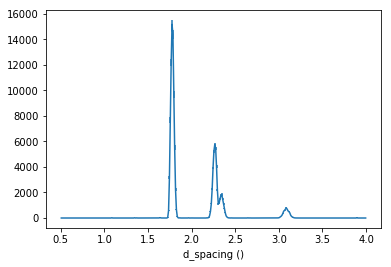

('coll_len,:', 4.889011794163939, 'focal_distance,:', 47.514246340657664, 'collimator_performance: ', 0.08195858509556164)
('coll height at detector side: ', 35.4149051359839)
('coll width at detector side: ', 35.4149051359839)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc83f3730> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


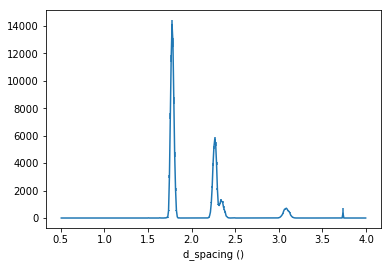

('coll_len,:', 6.8135232227540286, 'focal_distance,:', 35.68436294042665, 'collimator_performance: ', 0.08586314496943977)
('coll height at detector side: ', 42.651551402881815)
('coll width at detector side: ', 42.651551402881815)
('vertical number of channels: ', 8.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc87e5578> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


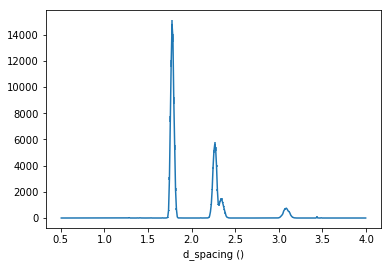

('coll_len,:', 7.379196074709569, 'focal_distance,:', 43.802665608748605, 'collimator_performance: ', 0.08754073502838632)
('coll height at detector side: ', 33.78777098672767)
('coll width at detector side: ', 33.78777098672767)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc87a0d08> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


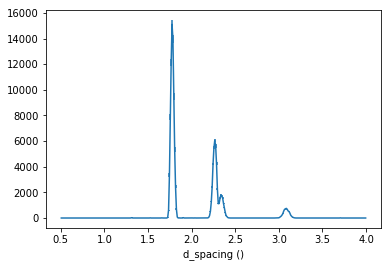

('coll_len,:', 3.6290477411344577, 'focal_distance,:', 36.91627744293875, 'collimator_performance: ', 0.08171723765140686)
('coll height at detector side: ', 37.20669697680835)
('coll width at detector side: ', 37.20669697680835)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc82ee890> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


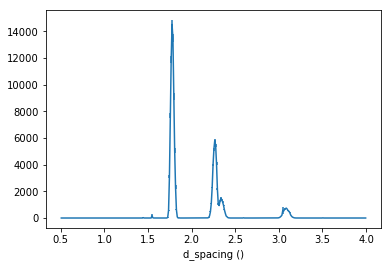

('coll_len,:', 6.4879842121482145, 'focal_distance,:', 38.160052160021806, 'collimator_performance: ', 0.08895268818308125)
('coll height at detector side: ', 42.70134814717276)
('coll width at detector side: ', 42.70134814717276)
('vertical number of channels: ', 8.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc8788cb0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


In [ ]:
coll.optimize()